#### Importing required libraries and packages

In [228]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

#### Loading data

In [229]:
df = pd.read_csv("ford.csv")
print(type(df))
display(df)

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
...,...,...,...,...,...,...,...,...
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6


#### Checking for missing values, data types of the columns

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


#### Checking the number of unique values in the 'model' column

In [231]:
print(df['model'].unique())

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']


#### Checking the number of unique values in the 'transmission' column

In [232]:
print(df['transmission'].unique())

['Automatic' 'Manual' 'Semi-Auto']


#### Checking the number of unique values in the 'fuelType' column

In [233]:
print(df['fuelType'].unique())

['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


####  Groupby based on model

In [234]:
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_model)

,count,mean,sum
model,,,
B-MAX,355,8287.526761,2942072
C-MAX,543,9914.567219,5383610
EcoSport,1143,12499.268591,14286664
Edge,208,22810.500000,4744584
Escort,1,3000.000000,3000
Fiesta,6556,10196.862569,66850631
Focus,4588,13185.882956,60496831
Fusion,16,2555.812500,40893
Galaxy,228,17841.872807,4067947


####  Groupby based on transmission

In [235]:
df_agg_transmission = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_transmission)

,count,mean,sum
transmission,,,
Automatic,1360,15734.022794,21398271
Manual,15517,11792.490043,182984068
Semi-Auto,1087,14919.034039,16216990


####  Groupby based on fuelType

In [236]:
df_agg_fuelType = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_fuelType)

,count,mean,sum
fuelType,,,
Diesel,5762,13659.173724,78704159
Electric,2,15737.500000,31475
Hybrid,22,22149.090909,487280
Other,1,13800.000000,13800
Petrol,12177,11608.985382,141362615


#### Data preprocessing before visualization based on fuelType

In [237]:
# sort the dataframe based on the column 'count'
df_agg_fuelType =df_agg_fuelType.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_fuelType['percent_of_cars'] = (df_agg_fuelType['count']/df_agg_fuelType['count'].sum())*100

# convert the 'sum' column in millions
df_agg_fuelType['sum'] = df_agg_fuelType['sum']/1000000

# keep up to two decimal points
df_agg_fuelType= df_agg_fuelType.round(2)

# remove the 'count' column
df_agg_fuelType = df_agg_fuelType.drop('count', axis=1)

display(df_agg_fuelType.head())

,mean,sum,percent_of_cars
fuelType,,,
Petrol,11608.99,141.36,67.79
Diesel,13659.17,78.70,32.08
Hybrid,22149.09,0.49,0.12
Electric,15737.50,0.03,0.01
Other,13800.00,0.01,0.01


#### Data preprocessing before visualization based on model

In [238]:
# sort the dataframe based on the column 'count'
df_agg_model =df_agg_model.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100

# convert the 'sum' column in millions
df_agg_model['sum'] = df_agg_model['sum']/1000000

# keep up to two decimal points
df_agg_model= df_agg_model.round(2)

# remove the 'count' column
df_agg_model = df_agg_model.drop('count', axis=1)

display(df_agg_model)

,mean,sum,percent_of_cars
model,,,
Fiesta,10196.86,66.85,36.50
Focus,13185.88,60.50,25.54
Kuga,15823.47,35.21,12.39
EcoSport,12499.27,14.29,6.36
C-MAX,9914.57,5.38,3.02
Ka+,8707.86,4.62,2.96
Mondeo,12305.71,6.47,2.93
B-MAX,8287.53,2.94,1.98
S-MAX,17720.23,5.25,1.65


#### Data preprocessing before visualization based on transmission

In [239]:
# sort the dataframe based on the column 'count'
df_agg_transmission =df_agg_transmission.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_transmission['percent_of_cars'] = (df_agg_transmission['count']/df_agg_transmission['count'].sum())*100

# convert the 'sum' column in millions
df_agg_transmission['sum'] = df_agg_transmission['sum']/1000000

# keep up to two decimal points
df_agg_transmission= df_agg_transmission.round(2)

# remove the 'count' column
df_agg_transmission = df_agg_transmission.drop('count', axis=1)

display(df_agg_transmission)

,mean,sum,percent_of_cars
transmission,,,
Manual,11792.49,182.98,86.38
Automatic,15734.02,21.40,7.57
Semi-Auto,14919.03,16.22,6.05


#### Barplot

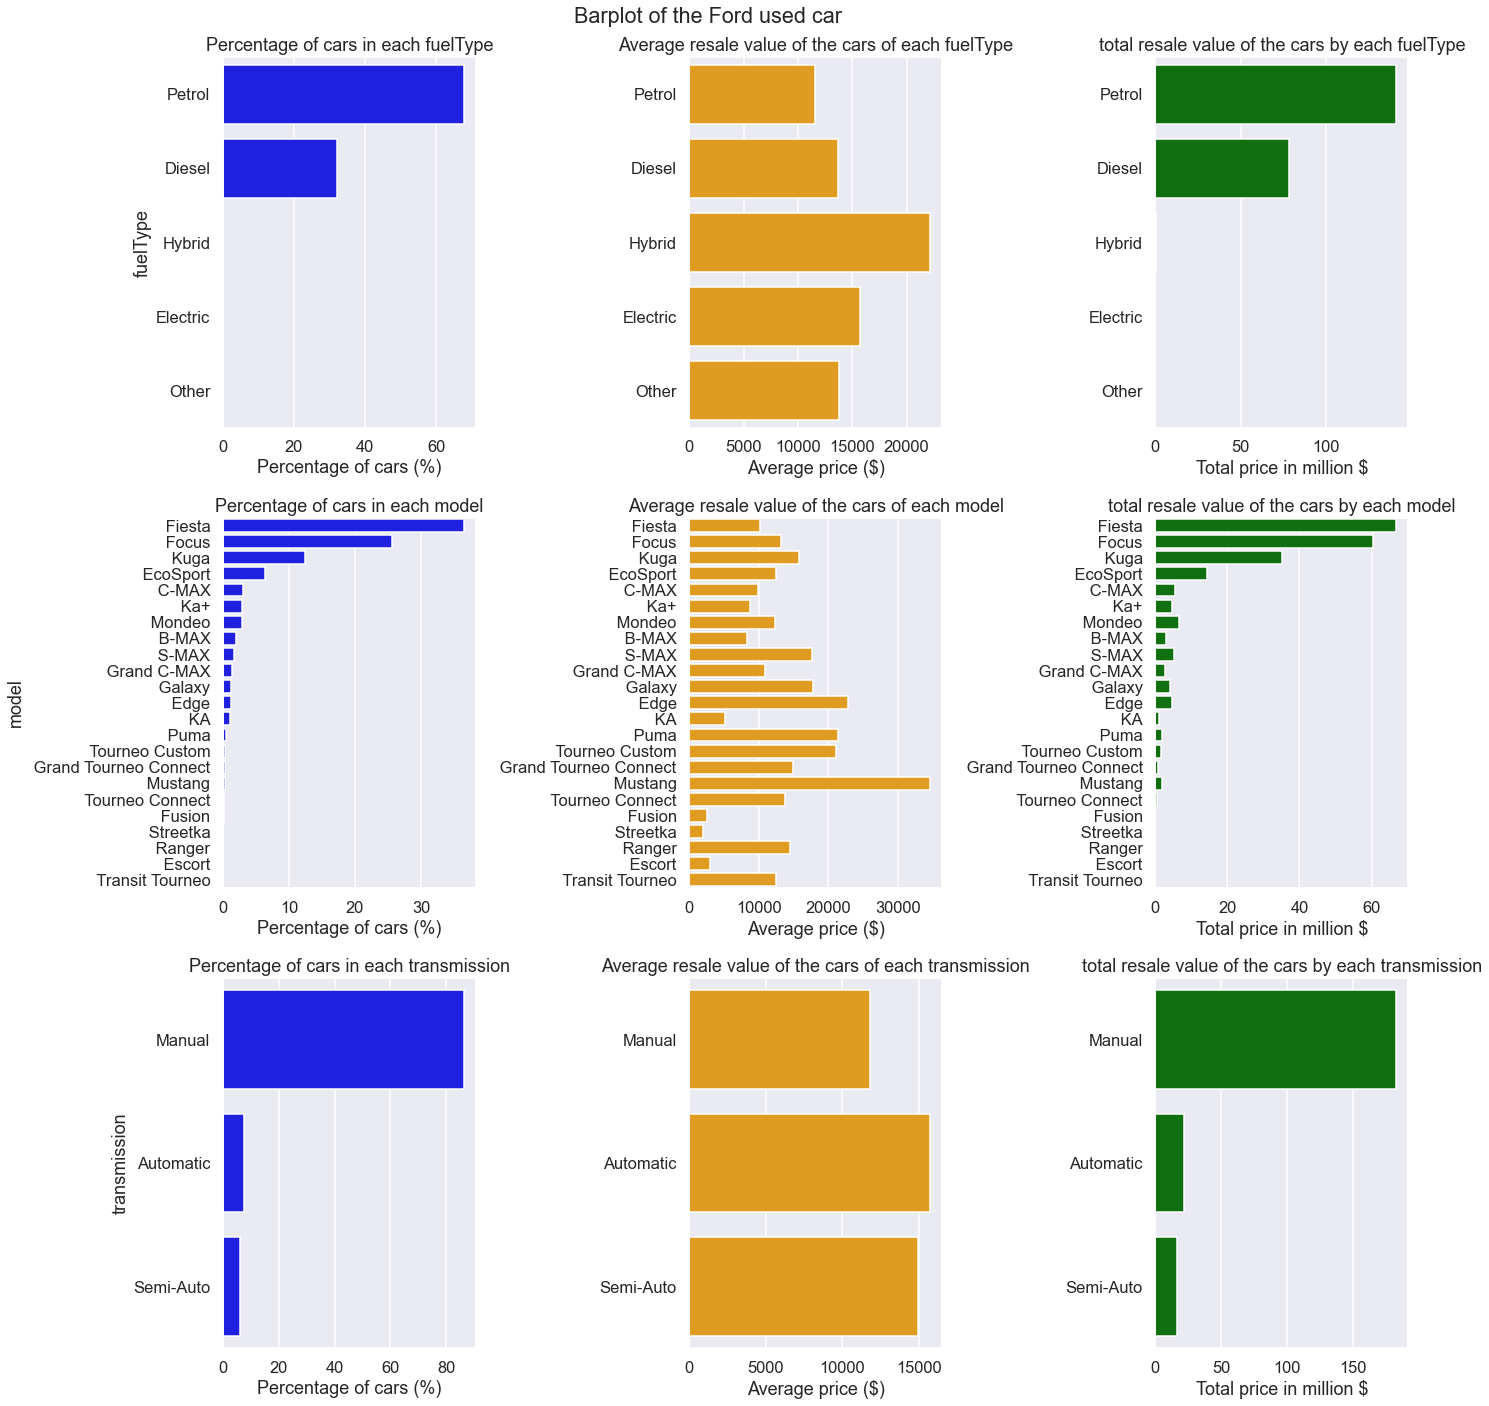

In [240]:
plt.figure(figsize=(20,20))

plt.subplot(3, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='blue')
plt.title("Percentage of cars in each fuelType")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(3, 3, 2)
sns.barplot(x='mean', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='orange')
plt.title("Average resale value of the cars of each fuelType")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(3, 3, 3)
sns.barplot(x='sum', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='green')
plt.title("total resale value of the cars by each fuelType")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.subplot(3, 3, 4)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(3, 3, 5)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(3, 3, 6)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.subplot(3, 3, 7)
sns.barplot(x='percent_of_cars', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='blue')
plt.title("Percentage of cars in each transmission")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(3, 3, 8)
sns.barplot(x='mean', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='orange')
plt.title("Average resale value of the cars of each transmission")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(3, 3, 9)
sns.barplot(x='sum', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='green')
plt.title("total resale value of the cars by each transmission")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Ford used car")
plt.tight_layout()
plt.show()

#### The top 5 selling car models in the dataset : Fiesta, Focus, Kuga, EcoSport, C-MAX. 

#### The average selling price of the top 5 selling car models: Mustang, Edge, Puma, Tourneo Custom, S_MAX. 

#### The total sale of the top 5 selling car models: Fiesta, Focus, Kuga, EcoSport, Mondeo.